In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt
import matplotlib

matplotlib.style.use("ggplot")
from ipywidgets import interact
import numpy as np
import matplotlib as mpl
import arrow
from matplotlib import animation, rc
from IPython.display import HTML, display
from datetime import timedelta


%matplotlib inline

In [2]:
#############################################################################
# Prepare data and import into a dataframe
#############################################################################


# Export Data from healthkit using [qs-access](https://itunes.apple.com/us/app/qs-access/id920297614?mt=8) app
exported_and_trandformed_csv_file = "data/sleep.csv"
df = pd.read_csv(exported_and_trandformed_csv_file)


def toDecimal(dt):
    return dt.hour + round(dt.minute / 60, 2)


# make dateColumn a datetime.
df["bedtime"] = pd.to_datetime(df["In bed at"])
df["waketime"] = pd.to_datetime(df["Until"])
df["dbedtime"] = df.bedtime.apply(toDecimal)
df["dwaketime"] = df.waketime.apply(toDecimal)
df["dasleep"] = pd.to_datetime(df.Asleep).apply(toDecimal)
# df["dquality"] = pd.to_datetime(df["Quality sleep"]).apply(toDecimal)
# df["ddeep"] = pd.to_datetime(df["Deep sleep"]).apply(toDecimal)
df["dduration"] = pd.to_datetime(df["Duration"]).apply(toDecimal)
df.drop("Until", inplace=True, axis=1)
df.drop("In bed at", inplace=True, axis=1)
idx_date = "idate"

# https://stackoverflow.com/questions/16176996/keep-only-date-part-when-using-pandas-to-datetime
df[idx_date] = pd.to_datetime(df.waketime).dt.normalize()

# renaming the column to avoid index having a name.
df = df.set_index(pd.to_datetime(df.waketime).dt.normalize().rename(None))

df.sort_index(inplace=True)

# Create Time Period Groups
# TODO use time periods for this.
idx_month_year = "month_year"
df[idx_month_year] = df.index.to_series().apply(lambda t: arrow.get(t).format("MMM-YY"))

idx_week_year = "week_year"
df[idx_week_year] = df.index.to_series().apply(lambda t: f"{t.week}-{t.year-2000}")

#########################
# Clean data
###########################

# Remove 0 weight values.
df = df.replace(0, np.nan)
# Throw away junk data at the start of time
df = df["2010/1/1":]  # type: ignore

# Throw away any weights less then 100
# Remove any rows with 0 values

cNoHeartRate = df[df.Heartrate == "--"].Duration.count()
print(f"Dropping {cNoHeartRate} w/o heart rate and other rich data ")
df = df[df.Heartrate != "--"]
df.Heartrate = pd.to_numeric(df.Heartrate)

# Helpful time aliases
df_alltime = df
df

Dropping 24 w/o heart rate and other rich data 


,Duration,Asleep,Time awake in bed,Fell asleep in,Quality sleep,Deep sleep,Heartrate,Tags,Notes,bedtime,waketime,dbedtime,dwaketime,dasleep,dduration,idate,month_year,week_year
2018-09-03,7:39,7:14,25,--,5:21,2:29,57,--,--,2018-09-02 21:50:00,2018-09-03 05:29:00,21.83,5.48,7.23,7.65,2018-09-03,Sep-18,36-18
2018-09-09,6:49,6:09,40,--,4:19,1:28,54,--,--,2018-09-08 21:54:00,2018-09-09 04:43:00,21.90,4.72,6.15,6.82,2018-09-09,Sep-18,36-18
2018-09-10,7:28,6:42,46,12,5:26,1:29,55,--,--,2018-09-09 21:32:41,2018-09-10 05:01:00,21.53,5.02,6.70,7.47,2018-09-10,Sep-18,37-18
2018-09-11,7:57,7:37,20,--,5:21,1:46,62,--,--,2018-09-10 21:41:00,2018-09-11 05:38:00,21.68,5.63,7.62,7.95,2018-09-11,Sep-18,37-18
2018-09-12,8:26,7:40,46,--,5:12,43,55,--,--,2018-09-11 21:02:00,2018-09-12 05:28:00,21.03,5.47,7.67,8.43,2018-09-12,Sep-18,37-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-19,9:49,9:23,26,--,6:03,1:16,59,--,--,2020-11-18 20:00:00,2020-11-19 04:51:00,20.00,4.85,9.38,9.82,2020-11-19,Nov-20,47-20
2020-11-20,6:36,6:36,0,--,4:46,45,59,--,--,2020-11-19 21:16:00,2020-11-20 03:52:00,21.27,3.87,6.60,6.60,2020-11-20,Nov-20,47-20
2020-11-21,10:53,9:22,1:31,--,6:23,1:36,61,--,--,2020-11-20 18:31:00,2020-11-21 05:24:00,18.52,5.40,9.37,10.88,2020-11-21,Nov-20,47-20
2020-11-22,11:27,9:07,2:20,--,6:02,--,61,--,--,2020-11-21 20:30:00,2020-11-22 07:57:00,20.50,7.95,9.12,11.45,2020-11-22,Nov-20,47-20


In [3]:
# OMG - SO SAD - box plot sorting is broken in - vega:
# https://github.com/vega/vega-lite/issues/4932

# GRR - Need to go back to matplotlib
def box_plot_metric(df, x, fact, title, domain):
    # In theory can use plot.ly (not free)  or Bokeh (not mpl compatible) but issues. So setting dimensions old school.
    # Manually setting the weight and width.
    height_in_inches = 8
    mpl.rc("figure", figsize=(2 * height_in_inches, height_in_inches))

    ax = sns.boxplot(x=x, y=fact, data=df)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set_title(title)
    ax.set_xlabel("date")
    ax.set_ylabel(fact)
    ax.set_ylim(domain[0], domain[1])
    plt.show()


def box_plot_metric_vegas_broken_sort_order(df, x, fact, title, domain):
    height_in_inches = 4 * 60  # todo figure out how to get this by calculation
    c = (
        alt.Chart(df)
        .mark_boxplot()
        .encode(y=alt.Y(fact, scale=alt.Scale(domain=domain, clamp=True)), x=x)
        .properties(width=4 * height_in_inches, height=height_in_inches, title=title)
        .interactive()
    )
    display(c)

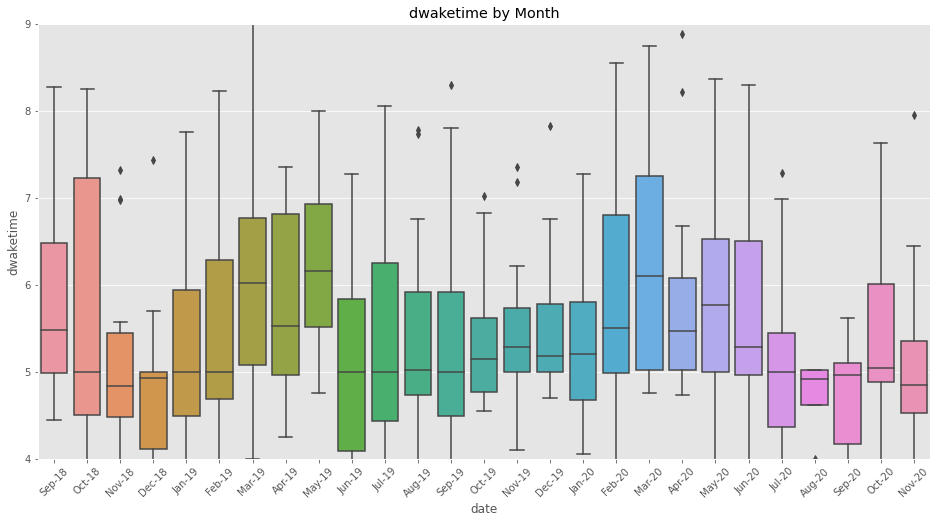

ValueError: min() arg is an empty sequence

In [4]:
earliest = arrow.utcnow().shift(months=-12).date()
# fact, domain = "dbedtime", (18, 25)
fact, domain = "dwaketime", (4, 9)
# fact,domain = "Heartrate", (50,80)


box_plot_metric(df_alltime, idx_month_year, fact, f"{fact} by Month", domain=domain)

box_plot_metric(
    df[earliest:], idx_month_year, fact, title=f"Recent {fact} by month", domain=domain
)
box_plot_metric(
    df[earliest:], idx_week_year, fact, title=f"Recent {fact} by week", domain=domain
)

# Time Series Analysis using resampling

In [5]:
# fact,domain = "dbedtime", (19,24)
# fact,domain = "dwaketime", (4,9)
# fact, domain = "Heartrate", (50, 80)

summary_quantile = 0.5  # 0.5 for median

print("Scroll to see year markers, select in index to zoom in")

for freq in "Month Week".split():

    pd_freq_value = freq[0]  # hack, pandas Freq are D,W,M

    facts_to_graph = "dbedtime;dwaketime;dduration".split(";")
    to_graph = (
        df.copy()[facts_to_graph].resample(pd_freq_value).quantile(summary_quantile)
    )

    # Convert bedtime from PM to AM so it looks better on a rgraph
    # Assume if bed time is before 12, it's wrapped to the next day. Clamp it ot midnight
    def FixUpBedtime(x):
        return x - 12 if x > 12 else 11.99

    to_graph.dbedtime = to_graph.dbedtime.apply(FixUpBedtime)

    # At this point each summarized fact is in its own column
    # melt them  (e.g. multiplex them) into a single column, which results in variable and value column.

    melted = to_graph.reset_index().melt(
        id_vars=["index"],
    )
    height_in_inches = 60  # todo figure out how to get this by calculation

    selection = alt.selection_multi(fields=["variable"], bind="legend")
    c = (
        alt.Chart(melted)
        .mark_line(point=True)
        .encode(
            y=alt.Y("value", title="", scale=alt.Scale()),
            x="index:T",
            color="variable",
            tooltip=["index:T", "value:Q"],
            opacity=alt.condition(selection, alt.value(1), alt.value(0.2)),
        )
        .properties(
            width=16 * height_in_inches,
            height=4 * height_in_inches,
            title=f"Sleep stats by {freq} @P{summary_quantile*100}",
        )
        .interactive()
    ).add_selection(selection)

    display(c)

Scroll to see year markers, select in index to zoom in


alt.Chart(...)

alt.Chart(...)

In [6]:
fact, domain = "Heartrate", (50, 80)

print("Scroll to see year markers, select in index to zoom in")


def quantile_support_empty(x, q):
    # quantile crashes if it's passed an array with all None's, so handle that case manually
    # all the other summary metrics like np.mean and np.median support this, so arguably it's an np bug.
    # but whatevez'
    # https://stackoverflow.com/questions/45138917/python-error-cannot-do-a-non-empty-take-from-an-empty-axes
    if len(x.dropna()) == 0:
        return None

    return np.quantile(x, q=q)


def p25(x):
    return quantile_support_empty(x, 0.25)


def p50(x):
    return quantile_support_empty(x, 0.5)


def p90(x):
    return quantile_support_empty(x, 0.75)


for freq in "Week Month".split():
    pd_freq_value = freq[0]  # hack, pandas Freq are D,W,M
    df_group_time = df.copy()[fact].resample(pd_freq_value)

    # Make a long frame with percentiles as facts

    # ASIDE:
    #   We could do this with lambda functions for conciseness and dynamism, BUT column renaming during agg is a PITA
    #   so just doing it with named functions for now.

    df_to_graph = df_group_time.agg([p25, p50, p90])
    display(df_to_graph)

    # Convert the long column to narrow, by multiplexing it down (df.melt)
    df_melted = df_to_graph.reset_index().melt(
        id_vars=["index"],
    )
    height_in_inches = 60  # todo figure out how to get this by calculation
    selection = alt.selection_multi(fields=["variable"], bind="legend")
    c = (
        alt.Chart(df_melted)
        .mark_line(point=True)
        .encode(
            y=alt.Y("value", title="", scale=alt.Scale(domain=domain)),
            x="index:T",
            color="variable",
            tooltip=["index:T", "value:Q"],
            opacity=alt.condition(selection, alt.value(1), alt.value(0.2)),
        )
        .properties(
            width=16 * height_in_inches,
            height=6 * height_in_inches,
            title=f"{fact} By {freq}",
        )
        .interactive()
    ).add_selection(selection)

    display(c)

Scroll to see year markers, select in index to zoom in


,p25,p50,p90
2018-09-09,54.75,55.5,56.25
2018-09-16,55.00,56.0,57.00
2018-09-23,55.00,56.0,61.50
2018-09-30,56.50,61.0,61.50
2018-10-07,53.50,55.5,56.75
...,...,...,...
2020-11-01,60.00,62.0,63.00
2020-11-08,61.50,62.0,65.00
2020-11-15,61.00,62.0,64.50
2020-11-22,59.00,61.0,61.50


alt.Chart(...)

,p25,p50,p90
2018-09-30,55.00,57.0,61.00
2018-10-31,56.00,57.0,61.00
2018-11-30,55.75,57.0,60.25
2018-12-31,57.00,61.0,62.75
2019-01-31,58.00,60.0,64.25
2019-02-28,60.25,63.5,67.75
2019-03-31,63.00,67.0,71.00
2019-04-30,62.00,65.0,67.50
2019-05-31,64.00,67.5,72.00
2019-06-30,65.25,67.0,70.75


alt.Chart(...)